# Final Project: Intro to Programming Nanodegree

## Data Analysis

### Chosen dataset: TMDb movie data

The data set contains information about 10,000 movies collected from The Movie Database (TMDb), cleaned from the original data on [Kaggle](https://www.kaggle.com/tmdb/tmdb-movie-metadata), including user ratings and revenue.


### Suggested questions to analyze the data set

The analysis of the data set will follow the questions reported below.  

1. General consideration on the movie market

    - What is the amount of movies produced per year? 
    - Are there years where very few or many movies where produced?
    - Is it an area where profits can be generated? 
    - How the total amount of money spent per year is changing over time? And the revenues?  
<br>
2. How are the different variables related to each other? Among which variables can the strongest dependencies be found?
    - How popularity compare to the vote average?
    - How is the budget related to the revenues?
    - Is the runtime having any effect on the other variables, like popularity, budget, vote?  
<br>

3. How are profits, popularity and votes related to the directors?



## Step 1: Load Data from CSVs

### Notes:
- Certain columns, like *'cast'* and *'genres'*, contain multiple values separated by pipe (|) characters.
- There are some odd characters in the *'cast'* column. Don't worry about cleaning them. You can leave them as is.
- The final two columns ending with *'_adj'* show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Load data from the csv
orig_tmd_df = pd.read_csv('tmdb-movies.csv')

# Print the data types and the first row to understand the structure of the data set
print('Data types:')
print(orig_tmd_df.dtypes,'\n')

print('Example of data, first row:')
print(orig_tmd_df.iloc[0,:])

Data types:
id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object 

Example of data, first row:
id                                                                 135397
imdb_id                                                         tt0369610
popularity                                                        32.9858
budget                                            

## Step 2: Fixing Data Types

- The columns *'cast'*, *'keywords'*, *'genres'* and *'production_companies'* are read and stored in the csv as a string. The name separator is '|'. With the function **'str.split'** the string is converted into a list containing the different names.

In [2]:
orig_tmd_df['cast'] = orig_tmd_df.cast.str.split('|')
orig_tmd_df['keywords'] = orig_tmd_df.keywords.str.split('|')
orig_tmd_df['genres'] = orig_tmd_df.genres.str.split('|')
orig_tmd_df['production_companies'] = orig_tmd_df.production_companies.str.split('|')

# Check for correctness
orig_tmd_df.iloc[0,:]

id                                                                 135397
imdb_id                                                         tt0369610
popularity                                                        32.9858
budget                                                          150000000
revenue                                                        1513528810
original_title                                             Jurassic World
cast                    [Chris Pratt, Bryce Dallas Howard, Irrfan Khan...
homepage                                    http://www.jurassicworld.com/
director                                                  Colin Trevorrow
tagline                                                 The park is open.
keywords                [monster, dna, tyrannosaurus rex, velociraptor...
overview                Twenty-two years after the events of Jurassic ...
runtime                                                               124
genres                     [Action, Ad

- The release date, read as a string in the format 'month/day/year_2_digits', is converted in datetime format. The function from lesson 5 *'Data Analysis Process'* is used.

In [3]:
from datetime import datetime as dt

def parse_date(date):
    '''
    Takes a date as a string, and returns a Python datetime object.
    If there is no date given, returns None
    '''
    if date == '':
        return None
    else:
        return dt.strptime(date, '%m/%d/%y')

# Apply the parse date function only ONCE to the DataFrame
orig_tmd_df['release_date'] = orig_tmd_df['release_date'].apply(parse_date)

# Check for correctness
orig_tmd_df.loc[0,'release_date']


Timestamp('2015-06-09 00:00:00')

- Removing from the data frame all the rows where an NaN is occuring for the *director* column and where budget and revenues are negative or zero.  
Note that only the director column is considered for the NaN because it is the only non numerical data on which investigations are performed. In the code comments the option to delete all the rows where an NaN is occuring is given.  
The original dataframe is kept under the name *orig_tmd_df*. As Pandas dataframes are treating NaN as zero values, for most of the computations the original dataframe is used or both data sets are given. The dataframe used will be specified in the respective section of the document.

In [4]:
# Further clean the data:
# - remove all the rows where in any column a NaN is found
# - remove all the rows where the budget is less or equal to zero
# - remove all the rows where the revenue is less or equal to zero
# NOTE: for each step a new dataframe is created, otherwise a reference
#       is going to be created and the original one modified
#       when the new df is modified

print('Initial dataframe sizes: '+str(orig_tmd_df.shape))

# Remove NaN data
df_dropna = pd.DataFrame(orig_tmd_df.dropna(subset = ['director']))
# To remove all rows with NaN use the following:
# pd.DataFrame(orig_tmd_df.dropna(axis=0, how='any'))
print('Dataframe sizes after dropping the rows with NaN : '+str(df_dropna.shape))

# Remove rows where budget_adj <= 0
df_pos_budget = pd.DataFrame(df_dropna[~(df_dropna['budget_adj'] <= 0 )])
print('Dataframe sizes after dropping the rows with negative or zero budget : '+str(df_pos_budget.shape))

# Remove rows where revenue_adj <= 0
df_pos_revenue = pd.DataFrame(df_pos_budget[~(df_pos_budget['revenue_adj'] <= 0 )])
print('Dataframe sizes after dropping the rows with negative or zero revenue : '+str(df_pos_revenue.shape))

tmd_df = pd.DataFrame(df_pos_revenue)
print('New dataframe sizes: '+str(tmd_df.shape))

Initial dataframe sizes: (10866, 21)
Dataframe sizes after dropping the rows with NaN : (10822, 21)
Dataframe sizes after dropping the rows with negative or zero budget : (5166, 21)
Dataframe sizes after dropping the rows with negative or zero revenue : (3854, 21)
New dataframe sizes: (3854, 21)


## Step 3: Investigating the data

#### The reader is referred to the suggested questions to analyze the data set reported at the beginning of the document.


### 1. The movie market

As a starting point the movie market is considered. From the movie data one can first compute how many movies are produced per year and what is the trend between 1960 and 2015. 
<!-- 
print(tmd_df.release_year.min())
print(tmd_df.release_year.max()) 
-->
From the histogram below we can see that the movie production rate is approximately quadratically increasing over time.  

For this plot both the full data frame and the reduced one are considered (*orig_tmd_df* and *tmd_df*). Both data set show a similar trend.


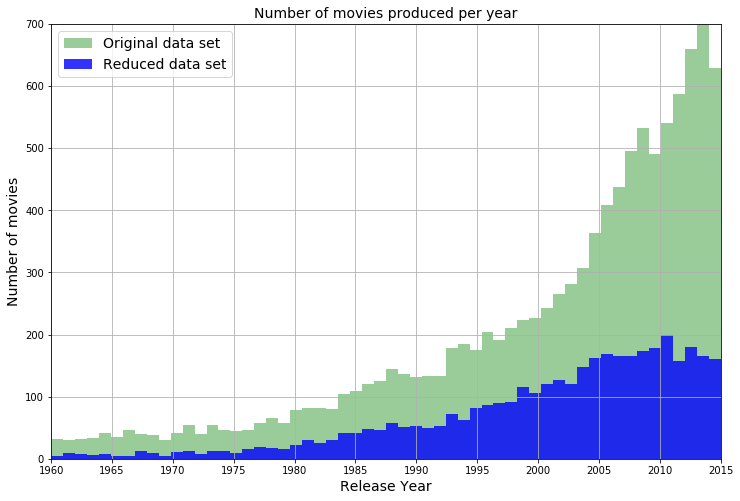

In [5]:
# Import seaborn for nicer plots
import seaborn as sns

# Create the groupby objects as respect to the release year from the full dataframe
group_by_year = orig_tmd_df.groupby('release_year', as_index=True,  axis=0)
# Number of years to get the spacing for the histogram plot
n_years = len(group_by_year['release_year'].count())

# Plot of the number of movies produced per year
fig, ax = plt.subplots(figsize=(12,8))
orig_tmd_df['release_year'].hist(bins=n_years,color='g', alpha=0.4)
tmd_df['release_year'].hist(bins=n_years,color='b', alpha=0.8)
ax.grid(True)
ax.set_xlabel("Release Year",fontsize = 14)
ax.set_ylabel("Number of movies",fontsize = 14)
ax.set_title('Number of movies produced per year',fontsize = 14)
plt.xlim(1960, 2015)
plt.ylim(0,700)
plt.xticks(np.linspace(1960,2015,12))
#create legend
plt.legend(['Original data set', 'Reduced data set'],fontsize = 14)
plt.show()


The next step is to compute how much money were invested in the production of movies and what was the overall revenue per year. These two results can give an idea on how the movie market is valuable and the trend over the years, from 1960 to 2015. All the results presented from now on regarding budgets and revenues are computed using the values adjusted to inflation.

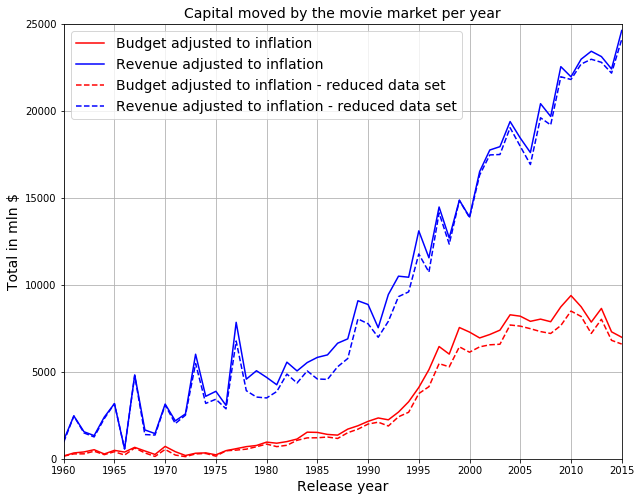

In [6]:
# Create the groupby objects as respect to the release year from the original dataframe
group_by_year = orig_tmd_df.groupby('release_year', as_index=True,  axis=0)
# Create the groupby objects to compute the sums of budget and revenues per year
group_years_budget = group_by_year['budget_adj'].sum()
group_years_revenue = group_by_year['revenue_adj'].sum()

# Create the groupby objects as respect to the release year from the original dataframe
group_by_year_red = tmd_df.groupby('release_year', as_index=True,  axis=0)
# Create the groupby objects to compute the sums of budget and revenues per year
group_years_budget_red = group_by_year_red['budget_adj'].sum()
group_years_revenue_red = group_by_year_red['revenue_adj'].sum()

# Plot total budget and total revenues over the years
fig,ax  = plt.subplots(figsize=(10,8))
ax.plot(group_years_budget.index.values, group_years_budget/10**6, 'r-')
ax.plot(group_years_revenue.index.values, group_years_revenue/10**6, 'b-')
ax.plot(group_years_budget_red.index.values, group_years_budget_red/10**6, 'r--')
ax.plot(group_years_revenue_red.index.values, group_years_revenue_red/10**6, 'b--')
ax.set_xlabel(xlabel="Release year",fontsize = 14)
ax.set_ylabel(ylabel="Total in mln $",fontsize = 14)
ax.legend(["Budget adjusted to inflation", "Revenue adjusted to inflation", 
           "Budget adjusted to inflation - reduced data set", "Revenue adjusted to inflation - reduced data set"],
          fontsize=14);
ax.set_title('Capital moved by the movie market per year',fontsize = 14)
ax.grid(True)
plt.axis([1960, 2015, 0, 25000])
plt.xticks(np.linspace(1960,2015,12))
plt.show()


As can be seen from the figure below, the overall trend of the revenues is increasing over the years and always above the total budget. This fact suggests that the movie market is constantly generating profits. Of course this does not mean that the balance budget - revenue for a single movie is always positive. This aspect will be investigated in the next section.

A somehow unexpected behaviour is shown instead by the total amount of money invested per year in movies production. The total budget remained approximately constant till 1975, then it started growing with different rate till 2000, when a sort of plateau was reached. From 2010 it seems that the total amount of money invested in the movie production is decreasing. Nonetheless, as pointed out before, the revenues are increasing.

### 2.1 Relation between budget, revenue and profits/losses

At this point it is interesting to see how budget, revenue and profits/losses are related for each movie. As a first step the difference between revenues and budget is considered. This quantity is called *balance* from now on and if positive is a profit, if negative a loss. 

For these investigations the reduced dataframe is used, such that minimum values can be found.

In [7]:
tmd_df = tmd_df.assign(balance = tmd_df['revenue_adj'] - tmd_df['budget_adj'])

To begin with, the result of the *describe()* function applied to each of the mentioned variable is printed out. In this way we can have an idea of the overall properties of the variable under investigation.

In [8]:
print('Statistics for the budget: ')
print(tmd_df['budget_adj'].describe())

print('\nStatistics for the revenue: ')
print(tmd_df['revenue_adj'].describe())

print('\nStatistics for the balance (profit/loss): ')
print(tmd_df['balance'].describe())

Statistics for the budget: 
count    3.854000e+03
mean     4.424668e+07
std      4.480521e+07
min      9.693980e-01
25%      1.309053e+07
50%      3.001611e+07
75%      6.061307e+07
max      4.250000e+08
Name: budget_adj, dtype: float64

Statistics for the revenue: 
count    3.854000e+03
mean     1.370621e+08
std      2.161130e+08
min      2.370705e+00
25%      1.835735e+07
50%      6.173068e+07
75%      1.632577e+08
max      2.827124e+09
Name: revenue_adj, dtype: float64

Statistics for the balance (profit/loss): 
count    3.854000e+03
mean     9.281537e+07
std      1.940765e+08
min     -4.139124e+08
25%     -1.507958e+06
50%      2.737064e+07
75%      1.074548e+08
max      2.750137e+09
Name: balance, dtype: float64


From the data above we can see that having eliminated the zero entries, the minimum budget and revenue can be displayed.  

The movies having the minimum and maximum budget, revenue and profit are printed below.  

It is interesting to see that the movie with the highest budget, *The Warrior's Way* by Sngmoo Lee was the most unsuccessful, with revenues much lower than the budget invested, thus producing a negative balance. On the other hand, *Avatar* by James Cameron was the movie generating the highest revenue, but not being able to beat *Star Wars* by George Lucas in terms of profits.

In [9]:
min_budget_title = tmd_df.loc[tmd_df.budget_adj.idxmin(axis=0, skipna=True),'original_title']
min_budget_dir = tmd_df.loc[tmd_df.budget_adj.idxmin(axis=0, skipna=True),'director']
max_budget_title = tmd_df.loc[tmd_df.budget_adj.idxmax(axis=0, skipna=True),'original_title']
max_budget_dir = tmd_df.loc[tmd_df.budget_adj.idxmax(axis=0, skipna=True),'director']
print('Movie with lowest budget: ' + min_budget_title + ' by ' + min_budget_dir + '\n')
print('Movie with highest budget: '+ max_budget_title + ' by ' + max_budget_dir + '\n\n')

min_revenue_title = tmd_df.loc[tmd_df.revenue_adj.idxmin(axis=0, skipna=True),'original_title']
min_revenue_dir = tmd_df.loc[tmd_df.revenue_adj.idxmin(axis=0, skipna=True),'director']
max_revenue_title = tmd_df.loc[tmd_df.revenue_adj.idxmax(axis=0, skipna=True),'original_title']
max_revenue_dir = tmd_df.loc[tmd_df.revenue_adj.idxmax(axis=0, skipna=True),'director']
print('Movie with lowest revenue: ' + min_revenue_title + ' by ' + min_revenue_dir + '\n')
print('Movie with highest revenue: '+ max_revenue_title + ' by ' + max_revenue_dir + '\n\n')

min_balance_title = tmd_df.loc[tmd_df.balance.idxmin(axis=0, skipna=True),'original_title']
min_balance_dir = tmd_df.loc[tmd_df.balance.idxmin(axis=0, skipna=True),'director']
max_balance_title = tmd_df.loc[tmd_df.balance.idxmax(axis=0, skipna=True),'original_title']
max_balance_dir = tmd_df.loc[tmd_df.balance.idxmax(axis=0, skipna=True),'director']
print('Movie with highest loss: ' + min_balance_title + ' by ' + min_balance_dir + '\n')
print('Movie with highest profit: '+ max_balance_title + ' by ' + max_balance_dir + '\n')


Movie with lowest budget: Love, Wedding, Marriage by Dermot Mulroney

Movie with highest budget: The Warrior's Way by Sngmoo Lee


Movie with lowest revenue: Shattered Glass by Billy Ray

Movie with highest revenue: Avatar by James Cameron


Movie with highest loss: The Warrior's Way by Sngmoo Lee

Movie with highest profit: Star Wars by George Lucas



### 2.2 Relation between budget and profits/losses

The graph below plots the profits/losses with respect to the budget. The two movies mentioned above are highlighted in the plot, too. The red line represent the profit equal to zero, i.e. when the revenue covered exactly the costs.
From this plot we can see that production with very high budgets do not produce necessarily profits. At the same time, movies produced with a relatively low budget brought quite some profits.  

For these investigations the reduced dataframe is used.

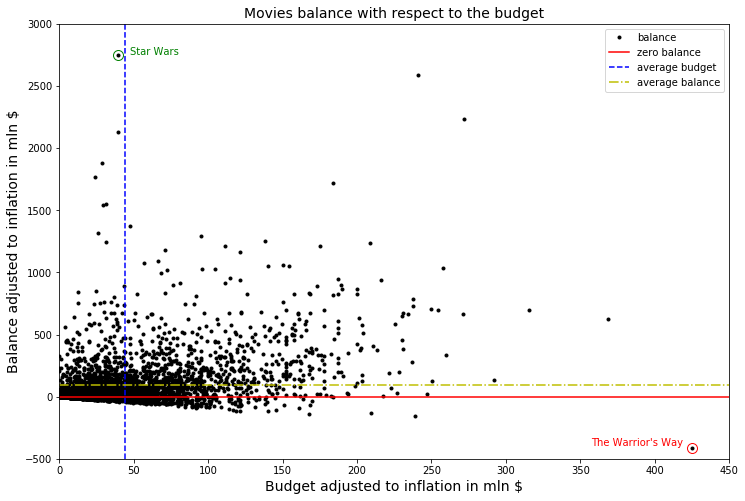

In [10]:
# Data for zero balance line
x_0 = [0.0, 450.0]
y_0 = [0.0, 0.0]
# Data for mean budget line
x_Bavg = [tmd_df['budget_adj'].mean()/10.0**6, tmd_df['budget_adj'].mean()/10.0**6]
y_Bavg = [-500.0, 3000.0]
# Data for mean balance line
x_Pavg = [0.0, 450.0]
y_Pavg = [tmd_df['balance'].mean()/10.0**6, tmd_df['balance'].mean()/10.0**6]
# Highlited points in the plot
max_balance_budget = tmd_df.loc[tmd_df.balance.idxmax(axis=0, skipna=True),'budget_adj']
max_balance = tmd_df['balance'].max()
max_balance_title = tmd_df.loc[tmd_df.balance.idxmax(axis=0, skipna=True),'original_title']
min_balance_budget = tmd_df.loc[tmd_df.balance.idxmin(axis=0, skipna=True),'budget_adj']
min_balance = tmd_df['balance'].min()
min_balance_title = tmd_df.loc[tmd_df.balance.idxmin(axis=0, skipna=True),'original_title']

# Plot budget - balance (profits/losses)
fig,ax  = plt.subplots(figsize=(12,8))
ax.plot(tmd_df['budget_adj']/10.0**6, tmd_df['balance']/10.0**6, 'k.', label='balance')
ax.plot(max_balance_budget/10.0**6, max_balance/10.0**6,'go', ms=10, mfc='none')
ax.plot(min_balance_budget/10.0**6, min_balance/10.0**6,'ro', ms=10, mfc='none')
ax.plot(x_0, y_0, 'r-', label='zero balance')
ax.plot(x_Bavg, y_Bavg, 'b--', label='average budget')
ax.plot(x_Pavg, y_Pavg, 'y-.', label='average balance')
ax.text(max_balance_budget*1.2/10.0**6, 
        max_balance/10.0**6, 
        max_balance_title, color='green')
ax.text(min_balance_budget*0.84/10.0**6, 
        min_balance*0.96/10.0**6, 
        min_balance_title, color='red')
ax.set_xlabel("Budget adjusted to inflation in mln $",fontsize = 14)
ax.set_ylabel("Balance adjusted to inflation in mln $",fontsize = 14)
ax.set_title('Movies balance with respect to the budget',fontsize = 14)
ax.legend()
plt.axis([0.0, 450.0, -500.0, 3000.0])

plt.show()

### 2.3 Variable correlation

From the overall statistics we got some information about the minimum and maximum values of budgets, revenues and balances, but from these data we cannot see how the different variables are related to each other. Also the plot above could not add much information about the relation among the variables. 

To investigate this aspect, an effective way is to consider the *Pearson's r*  or *Pearson correlation coefficient*. The coefficient varies between -1 and 1, where 1 means total positive linear correlation, -1 total negative linear correlation and 0 no linear correlation. In other words, if the coefficient is close to unity (or -1), the increase in one variable is going to produce an increase (or a decrease) in the other variable; instead, if the coefficient is close to zero, the two variables are not influencing each other.

For these investigations the reduced data set is used.

In this part of the data analysis the following variables are considered:
- popularity index
- runtime
- vote weighted average
- release year
- budget adjusted to the inflation
- revenue adjusted to the inflation
- balance (profits or losses)

To create the *heat map* corresponding to the correlation coefficients, a reduced dataframe with only the variables reported above is created.


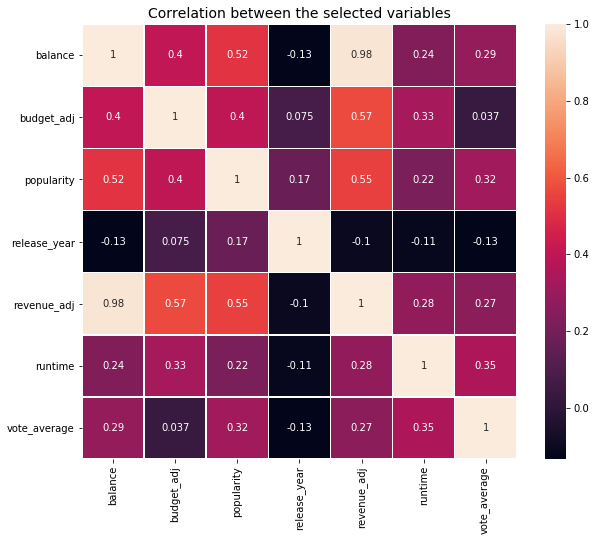

In [11]:
# Creating a reduced DataFrame to compute the correlations of the selected variables and visualize them as heat map

reduced_df = pd.DataFrame({'popularity': tmd_df['popularity'], 
                           'runtime': tmd_df['runtime'], 
                           'vote_average': tmd_df['vote_average'], 
                           'release_year': tmd_df['release_year'], 
                           'budget_adj': tmd_df['budget_adj'], 
                           'revenue_adj': tmd_df['revenue_adj'],
                           'balance': tmd_df['balance']
                          })

# Heatmap plot
plt.figure(figsize=(10,8))
plt.title('Correlation between the selected variables', fontsize=14)
sns.heatmap(reduced_df.corr(method='pearson'), 
            xticklabels=reduced_df.corr().columns,
            yticklabels=reduced_df.corr().columns,
            linewidths=0.5,
            annot=True,
            square=True
           )
plt.show()


#### Investigating the correlation heatmap

From the correlation heatmap we can deduce quite some information, even though definitive conclusion cannot be drown just from this coefficients. One can investigate the heatmap per column, thus given a variable, we can see how it is correlated to the others. The heatmap diagonal is ignored because it is just the correlation of the variable with itself, thus the correlation equal to 1.

- **Runtime, vote average and release year**  
The duration of the movie, the vote average and the release year have the smallest correlation coefficients with all the other variables considered, thus we will not consider them in the following investigation.

- **Balance, revenue, budget and popularity**  
As can be seen from the heatmap, the balance is striclty correletated to the revenues, and in minor but not negligible amount correlated to the budget. In fact, the balance is computed as the difference between revenues and budget, thus such result was expected.  
We can also see that the correlation between budget and revenue is equal to 0.57, thus we could infer that, on average, a certain amount of invested capital in the production of a movie is going to produce a certain revenue.  
Regarding the popularity index, the highest correlation is found with the revenues and equal to 0.55. One could then conclude that certain revenues come with a certain popularity index and viceversa.
The popularity index relates also to the budget, but not as much as for the revenues or the balance. It is also interesting to notice that the popularity is not really related to the vote average. This suggests that a movie voted "good" is not necessarily popular and viceversa. 

### 3. Director

Grouping the data with respect to the director and applying the sum function, one can obtained for instance the name of the directors whose movies generated the highest profit, the highest popularity (if the popularity index can be just summed up), the highest vote average with their movies.

For this analysis the reduced data set is used. Note that the director names contain odd characters that are not always correctly read. Since in the instructor notes was suggested to ignore them, I did not clean these data.

Even though the data are not displayed nicely, we can see that the movies by *Steven Spielberg* produced the highest profit in total, followed by *Christopher Nolan* and *George Lucas*.  

In [12]:
groupByDirectorDF_sum = tmd_df.groupby(['director']).sum()
groupByDirectorDF_mean = tmd_df.groupby(['director']).mean()

print('First three directors who directed movies with the total highest profit: \n')

print(groupByDirectorDF_sum.nlargest(3,'balance'))

First three directors who directed movies with the total highest profit: 

                      id  popularity      budget     revenue  runtime  \
director                                                                
Steven Spielberg  492620   53.455764  1551500000  9018563772     3657   
James Cameron      86462   28.477482   759900000  5841894863     1110   
George Lucas        7167   23.461834   360554000  3316550893      735   

                  vote_count  vote_average  release_year    budget_adj  \
director                                                                 
Steven Spielberg       36284         184.0         53860  2.076422e+09   
James Cameron          21756          56.8         15953  1.030642e+09   
George Lucas           12699          40.2         11927  4.697600e+08   

                   revenue_adj       balance  
director                                      
Steven Spielberg  1.520245e+10  1.312603e+10  
James Cameron     7.327221e+09  6.296578e+09  


Considering the popularity index, if the values can be summed up, then the most pupular director would be *Christopher Nolan*. Otherwise, we can look at the highest popularity average value. In this case the most popular director would be *Colin Trevorrow*, mainly thanks to the movie *Jurassic world* released in 2015.

In [13]:
print('First three directors with the highest popularity index sum: \n')

print(groupByDirectorDF_sum.nlargest(3,'popularity'))

print('\n\First three directors with the highest popularity index average: \n')

print(groupByDirectorDF_mean.nlargest(3,'popularity'))

First three directors with the highest popularity index sum: 

                       id  popularity      budget     revenue  runtime  \
director                                                                 
Christopher Nolan  235515   61.560756  1005000000  4167548502     1135   
Steven Spielberg   492620   53.455764  1551500000  9018563772     3657   
Peter Jackson      250289   48.204201  1326000000  6523244659     1668   

                   vote_count  vote_average  release_year    budget_adj  \
director                                                                  
Christopher Nolan       41561          61.1         16057  1.014694e+09   
Steven Spielberg        36284         184.0         53860  2.076422e+09   
Peter Jackson           31696          78.6         22041  1.374356e+09   

                    revenue_adj       balance  
director                                       
Christopher Nolan  4.164262e+09  3.149568e+09  
Steven Spielberg   1.520245e+10  1.312603e+10 

The director with the highest vote average is *Damien Chazelle*, mainly due to the movie *Whiplash* released in 2014.

In [14]:
print('First three directors with the highest vote average: \n')

print(groupByDirectorDF_mean.nlargest(3,'vote_average'))

First three directors with the highest vote average: 

                        id  popularity      budget      revenue  runtime  \
director                                                                   
Damien Chazelle   244786.0    4.780419   3300000.0   13993093.0    105.0   
Lenny Abrahamson  264644.0    3.557846   6000000.0   35401758.0    117.0   
Morten Tyldum     205596.0    8.110711  14000000.0  233555708.0    113.0   

                  vote_count  vote_average  release_year    budget_adj  \
director                                                                 
Damien Chazelle       2372.0           8.2        2014.0  3.039600e+06   
Lenny Abrahamson      1520.0           8.0        2015.0  5.519998e+06   
Morten Tyldum         3478.0           8.0        2014.0  1.289527e+07   

                   revenue_adj       balance  
director                                      
Damien Chazelle   1.288891e+07  9.849312e+06  
Lenny Abrahamson  3.256960e+07  2.704961e+07  
Morte

To conclude the study per director, the top 10 directors are selected with respect to the total profits that their movies generated. For these directors the number of movies and their average revenue are shown in the histograms below.  

As can be seen from the total number of movies, Steven Spielberg directed the largest number of movies among the ten, but his average ravenue is much smaller of some of his top 10 colleagues. In fact, George Lucas did not direct many movies, but his average revenue is one of the highest together with the one of David Yates.

In [15]:
# Visualize for the top 10 directors (selected with respect to the total profit 
# their movies generated) the number of movies they directed and their average revenues

#print(groupByDirectorDF_mean['balance'])

# groupByDirectorDF_sum.nlargest(10, 'balance')
top10_directors = groupByDirectorDF_sum.nlargest(10, 'balance').index

# select from the df the count of movies corresponding to the top 10 directors
count_df = pd.DataFrame(tmd_df.groupby(['director']).count())
nMovies_dir = pd.DataFrame(count_df.loc[top10_directors,'id'])

# Average revenues per top 10 directors
avgRevenue_dir = pd.DataFrame(groupByDirectorDF_mean.loc[top10_directors,'revenue_adj'])


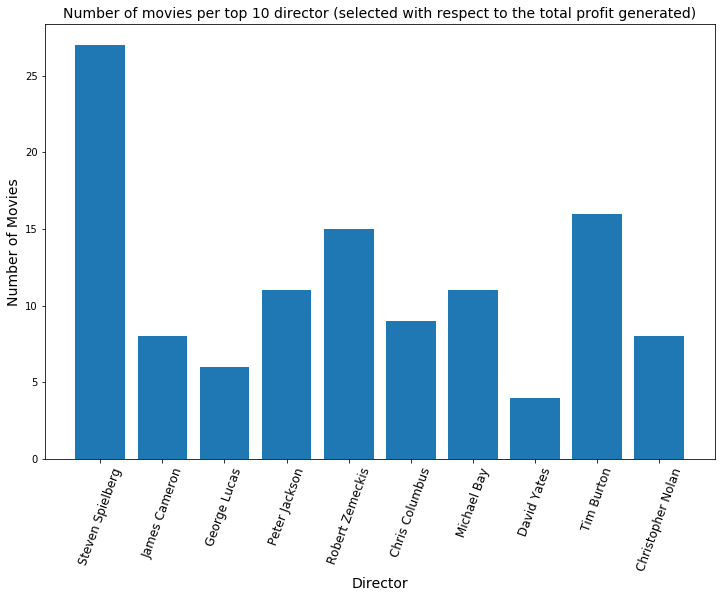

In [16]:
# Plot of the number of movies per top 10 director
fig, ax = plt.subplots(figsize=(12,8))

index = np.arange(len(top10_directors))
plt.bar(index, nMovies_dir['id'])
plt.xlabel('Director', fontsize=14)
plt.ylabel('Number of Movies', fontsize=14)
plt.xticks(index, top10_directors, fontsize=12, rotation=70)
plt.title('Number of movies per top 10 director (selected with respect to the total profit generated)', fontsize=14)
plt.show()

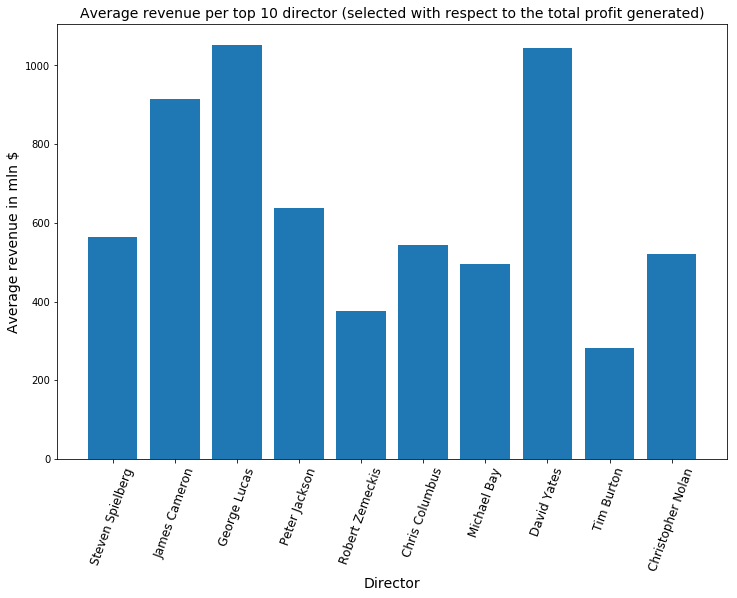

In [17]:
# Plot of the average revenue per top 10 director
fig, ax = plt.subplots(figsize=(12,8))

index = np.arange(len(top10_directors))
plt.bar(index, avgRevenue_dir['revenue_adj']/10**6)
plt.xlabel('Director', fontsize=14)
plt.ylabel('Average revenue in mln $', fontsize=14)
plt.xticks(index, top10_directors, fontsize=12, rotation=70)
plt.title('Average revenue per top 10 director (selected with respect to the total profit generated)', fontsize=14)
plt.show()

## Step 4: Conlusion Phase

To conclude, the limitation to the data analysis process conducted in this work are outlined here.

- First, in the data set many NaN entries were present. Deleting all the respective rows would have had drastically reduced the data set. For this reason I decided to remove only the entries where the *director* was a NaN.

- The original data set had to be further reduced to delete the entries with negative or zero revenues and budget because not realistic. These data would have compromised the computation of mean values, for instance.

- For a more extensive analysis, the treatment of the lists inside the data frame (e.g. *genres* and *cast*) would have been necessary

- Some variables, for instance the *popularity* index, were not fully clear, thus ambiguous to handle.